## Collect data from website

https://sesstim.univ-amu.fr/en/node/16950 


Let's do it by hand (you can try to automatize it for fun)

- PHS-PRIM : .C. Dufour, R. Giorgi, P. Le Coz, R. Lutaud, J. Mancini, C. Siani
- INF-PROF : N. Ngo, R. Ureña
- INF-GRAM : R. Ureña
- CHA-AIPH : P. Avillach, J.C. Dufour, R. Giorgi, F. Reinhart
- MET-MALE : R. Giorgi, Q. Marcou, N. Ngo.
- DAT-ORES : C. Beroud
- PHS-PHRM : E. Le Barbenchon, P. Auquier, R. Lutaud
- PHS-SNET : Emilien Schultz, R. Ureña
- MET-NLPF : Jean-Charles DUFOUR, Julien GROSJEAN, Antoine NEURAZ, Aurélie NEVEOL, Bastien RANCE, Pierre ZWEIGENBAUM

In a useful format (JSON)

In [51]:
data = {
    'PHS-PRIM' : ["Dufour","Giorgi","Le Coz","Lutaud","Mancini","Siani"],
    'INF-PROF' : ["Ngo", "Ureña"],
    'INF-GRAM' : ["Ureña"],
    'CHA-AIPH' : ["Avillach", "Dufour", "Giorgi", "Reinhart"],
    'MET-MALE' : ["Giorgi","Marcou","Ngo"],
    'DAT-ORES' : ["Beroud"],
    'PHS-PHRM' : ["Le Barbenchon", "Auquier","Lutaud"],
    'PHS-SNET' : ["Schultz","Ureña"],
    'MET-NLPF' : ["Dufour","Grosjean","Neuraz","Neveol","Rance","Zweigenbaum"]
}

# save it
import json
json.dump(data,open("data.json","w"))

## Build networks

We are going to use Networkx library : https://networkx.org/

Differents networks are possible :

- individuals - individuals
- individuals - course

First an empty network

In [68]:
import networkx as nx
import pandas as pd

In [58]:
network = nx.Graph()

Add a node :

In [59]:
network.add_node("PHS-PRIM",cat="course",weight=1)

In [8]:
print(network)

Graph with 1 nodes and 0 edges


In [60]:
network.add_edge("PHS-PRIM","Dufour")

In [61]:
print(network)

Graph with 2 nodes and 1 edges


Get an element

In [62]:
network.nodes

NodeView(('PHS-PRIM', 'Dufour'))

Save the network

In [19]:
nx.write_graphml(network,"networkM2.graphml")

## Visualise network

With networkx : https://networkx.org/documentation/stable/reference/drawing.html

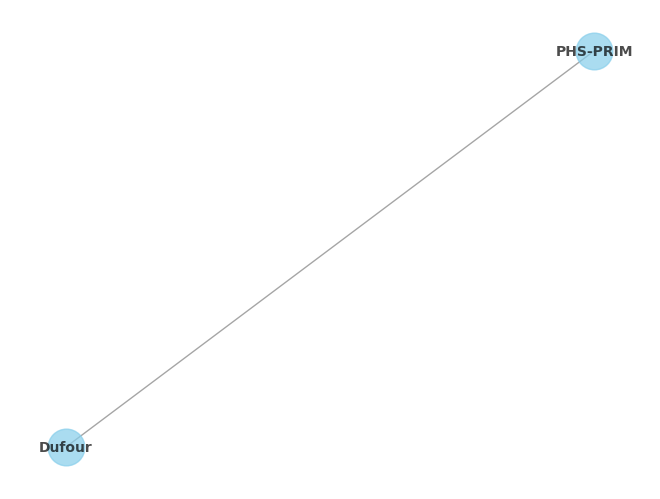

In [63]:
nx.draw(network, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', 
        font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

Possibility of a dynamic visualization with ipysigma : https://github.com/medialab/ipysigma

In [64]:
from ipysigma import Sigma

In [65]:
Sigma(network)

Sigma(nx.Graph with 2 nodes and 1 edges)

## Exercice 1 : Build the complete network

- from the data, build the complete network individual / course
    - weight of individuals is the number of course they give
- make a visualisation

In [66]:
network = nx.Graph()
for m in data:
    network.add_node(m,label=m, cat="course", weight=1)
    for p in data[m]:
        if network.has_node(p):
            network.nodes[p]["weight"]+=1
        else:
            network.add_node(p,label=p, cat="individual",weight=1)
        network.add_edge(p,m)
print(network)

Graph with 29 nodes and 28 edges


In [67]:
Sigma(network,node_size="weight")

Sigma(nx.Graph with 29 nodes and 28 edges)

In [70]:
pd.Series(dict(network.degree)).sort_values(ascending=False)

PHS-PRIM         6
MET-NLPF         6
CHA-AIPH         4
Ureña            3
PHS-PHRM         3
Dufour           3
MET-MALE         3
Giorgi           3
INF-PROF         2
Lutaud           2
PHS-SNET         2
Ngo              2
Le Barbenchon    1
Rance            1
Neveol           1
Neuraz           1
Grosjean         1
Schultz          1
Auquier          1
Le Coz           1
Beroud           1
DAT-ORES         1
Marcou           1
Reinhart         1
Avillach         1
Mancini          1
INF-GRAM         1
Siani            1
Zweigenbaum      1
dtype: int64

Build the network unimodal with only individuals. Use itertools for iterating on tuple from a list

In [71]:
import itertools

# crée un réseau
reseau_p = nx.Graph()

# boucle sur les données
for cours in data:
    
    # ajouter les personnes en incrémentant leur poids
    for personne in data[cours]:
        if not reseau_p.has_node(personne):
            reseau_p.add_node(personne,label=personne,weight=1)
        else:
            reseau_p.nodes[personne]["weight"]+=1
            
    # boucle sur les pairs de personnes
    for i,j in itertools.combinations(data[cours],2):
        if not reseau_p.has_edge(i,j):
            reseau_p.add_edge(i,j,weight=1)
        else:
            reseau_p.edges[i,j]["weight"]+=1

## Exercice 2 : Calculate different metrics

- degree distribution
- density
- centrality (s) : have a look to the documentation ; what is the node with the higher centrality ?
- calculate the number of components of the graph
- select only the principal component

In [72]:
nx.density(reseau_p)

0.22631578947368422

In [73]:
reseau_p.degree

DegreeView({'Dufour': 12, 'Giorgi': 9, 'Le Coz': 5, 'Lutaud': 7, 'Mancini': 5, 'Siani': 5, 'Ngo': 3, 'Ureña': 2, 'Avillach': 3, 'Reinhart': 3, 'Marcou': 2, 'Beroud': 0, 'Le Barbenchon': 2, 'Auquier': 2, 'Schultz': 1, 'Grosjean': 5, 'Neuraz': 5, 'Neveol': 5, 'Rance': 5, 'Zweigenbaum': 5})

In [74]:
nx.components.number_connected_components(reseau_p)

2

In [75]:
largest_component = max(nx.connected_components(reseau_p), key=len)
len(largest_component)

19

In [82]:
pd.Series(dict(reseau_p.degree)).sort_values(ascending=False)[0:5]

Dufour    12
Giorgi     9
Lutaud     7
Rance      5
Neveol     5
dtype: int64

Other centrality metrics

In [84]:
pd.Series(dict(nx.betweenness_centrality(reseau_p))).sort_values(ascending=False)[0:5]

Dufour    0.415205
Giorgi    0.362573
Lutaud    0.187135
Ngo       0.187135
Ureña     0.099415
dtype: float64

## Clusterisation

In [76]:
distrib = nx.community.louvain_communities(reseau_p, seed=123)

In [77]:

distrib = nx.community.louvain_communities(reseau_p, seed=123)
clus = {}
for i,j in enumerate(distrib):
    for k in j:
        clus[k] = i
nx.set_node_attributes(reseau_p,clus,name="cluster")

In [78]:
Sigma(reseau_p,node_size="weight",node_color = "cluster")

Sigma(nx.Graph with 20 nodes and 43 edges)